In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib

font_path='C:\\Windows\\Fonts\\gulim.ttc'
font=fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

In [ ]:
df = pd.read_csv('./data/train.csv')
df.drop('UID',axis=1)

,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,126216.0,177028.5,6237.0,755,0
9996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,371907.0,347449.5,53301.0,707,0
9997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,869736.0,176905.5,11436.0,733,0
9998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,443008.5,139294.5,25567.5,696,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   UID                10000 non-null  object  
 1   주거 형태              10000 non-null  object  
 2   연간 소득              10000 non-null  float64 
 3   현재 직장 근속 연수        10000 non-null  object  
 4   체납 세금 압류 횟수        10000 non-null  float64 
 5   개설된 신용계좌 수         10000 non-null  int64   
 6   신용 거래 연수           10000 non-null  float64 
 7   최대 신용한도            10000 non-null  float64 
 8   신용 문제 발생 횟수        10000 non-null  int64   
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64   
 10  개인 파산 횟수           10000 non-null  int64   
 11  대출 목적              10000 non-null  object  
 12  대출 상환 기간           10000 non-null  object  
 13  현재 대출 잔액           10000 non-null  float64 
 14  현재 미상환 신용액         10000 non-null  float64 
 15  월 상환 부채액           10000 non-null  float64 
 16  신용 점수

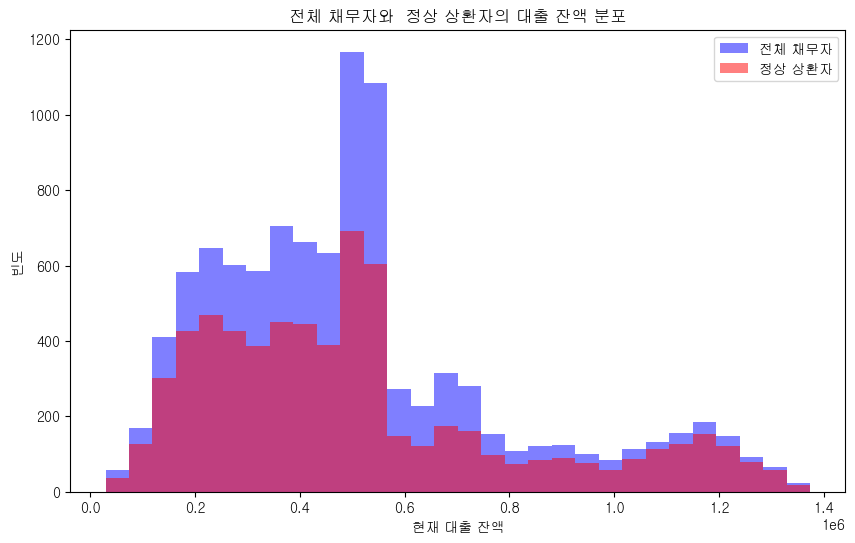

In [ ]:
import matplotlib.pyplot as plt

# 채무 불이행 여부에 따른 데이터 분리
df_repayment_0 = df[df["채무 불이행 여부"] == 0]  # 채무 상환자

plt.figure(figsize=(10, 6))
plt.hist(df["현재 대출 잔액"], bins=30,color='blue', alpha=0.5,label="전체 채무자")
plt.hist(df_repayment_0["현재 대출 잔액"],color='red', bins=30, alpha=0.5, label="정상 상환자")

plt.xlabel("현재 대출 잔액")
plt.ylabel("빈도")
plt.title("전체 채무자와  정상 상환자의 대출 잔액 분포")
plt.legend() 
plt.show()


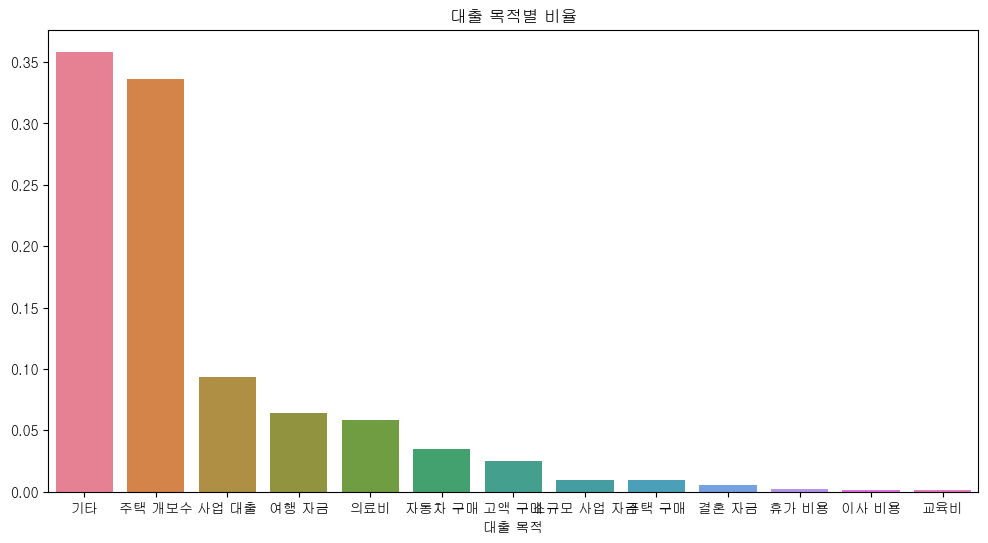

In [61]:
# 대출 목적별 비율

# 부채통합의 주 목적은 남은 부채들의 통합이기 때문에 실질적인 목적을 알 수 없어 제거함
df_sample=df[df['대출 목적']!='부채 통합']
loan_purpose_count=df_sample['대출 목적'].value_counts()
plt.figure(figsize=(12,6))
# x= 대출목적, y=대출목적 전체 대비 비율
sns.barplot(x=loan_purpose_count.index,y=loan_purpose_count / loan_purpose_count.sum(),hue=loan_purpose_count.index)
plt.xlabel("대출 목적")
plt.ylabel("")
plt.title("대출 목적별 비율")
plt.show()

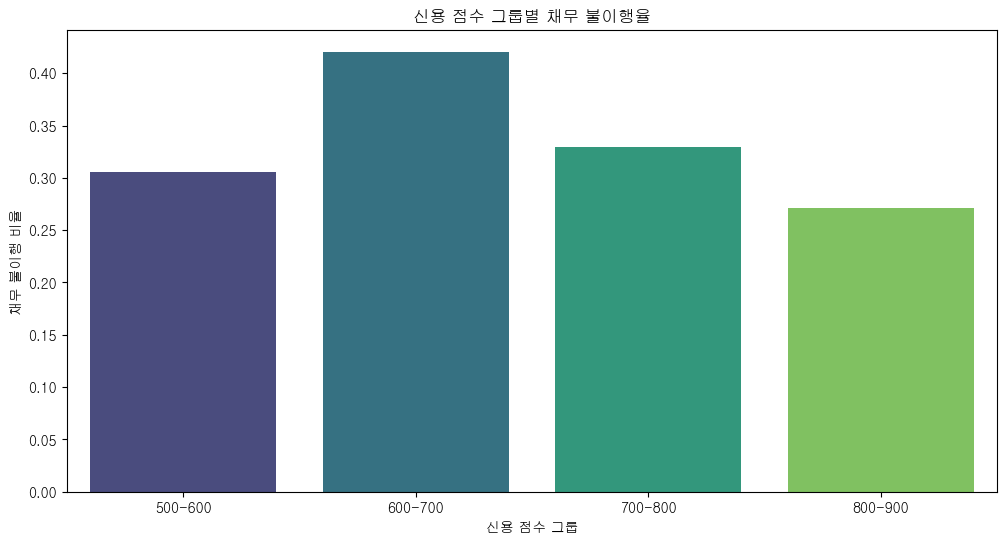

In [79]:
# 신용 점수 그룹 채무 불이행 비율
df['신용 점수 그룹'] = pd.cut(df['신용 점수'], bins=[500,600, 700,800, 900], labels=[ '500-600','600-700', '700-800','800-900'])

credit_score_default_rate = df.groupby('신용 점수 그룹', observed=False)['채무 불이행 여부'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=credit_score_default_rate['신용 점수 그룹'], y=credit_score_default_rate['채무 불이행 여부'], hue=credit_score_default_rate['신용 점수 그룹'], palette='viridis')

plt.xlabel('신용 점수 그룹')
plt.ylabel('채무 불이행 비율')
plt.title('신용 점수 그룹별 채무 불이행율')
plt.show()
